In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Feyi\Anaconda3\envs\tf\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Feyi\Anaconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Feyi\Anaconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\Feyi\Anaconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  stacklevel=1)


# Loading Dataset

In [2]:
time_series_dataset=pd.read_csv(r"Time_series_analysis_and_forecast_DATASET.csv")
time_series_dataset.head(10)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030
5,2010-09-01 05:00:00,15.8,1232.000,3.69,19.160
6,2010-09-01 06:00:00,15.8,1282.930,3.69,23.540
7,2010-09-01 07:00:00,15.8,1430.935,3.69,26.235
8,2010-09-01 08:00:00,15.8,1670.275,3.69,28.690
9,2010-09-01 09:00:00,15.8,1815.155,3.69,29.630


# Data Cleaning

In [3]:
time_series_dataset.columns

Index(['FullDate', 'Tmax', 'SysLoad', 'GasPrice', 'ElecPrice'], dtype='object')

In [4]:
time_series_dataset.shape

(92016, 5)

In [5]:
#Check datatype
time_series_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   FullDate   92016 non-null  object 
 1   Tmax       92016 non-null  float64
 2   SysLoad    92016 non-null  float64
 3   GasPrice   92016 non-null  float64
 4   ElecPrice  92016 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.5+ MB


In [6]:
#convert the "FullDate" feature from "object" to "datetime" datatype
time_series_dataset.FullDate = pd.to_datetime(time_series_dataset.FullDate)

In [7]:
#Check datatype again
time_series_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92016 entries, 0 to 92015
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   FullDate   92016 non-null  datetime64[ns]
 1   Tmax       92016 non-null  float64       
 2   SysLoad    92016 non-null  float64       
 3   GasPrice   92016 non-null  float64       
 4   ElecPrice  92016 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 3.5 MB


In [8]:
#check if there is any missing values
time_series_dataset.isnull().values.any()

False

In [9]:
time_series_dataset.head(10)

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
1,2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2,2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
3,2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
4,2010-09-01 04:00:00,15.8,1247.940,3.69,18.030
5,2010-09-01 05:00:00,15.8,1232.000,3.69,19.160
6,2010-09-01 06:00:00,15.8,1282.930,3.69,23.540
7,2010-09-01 07:00:00,15.8,1430.935,3.69,26.235
8,2010-09-01 08:00:00,15.8,1670.275,3.69,28.690
9,2010-09-01 09:00:00,15.8,1815.155,3.69,29.630


In [10]:
#Set FullData column as the index
time_series_dataset.set_index('FullDate', inplace=True)

In [11]:
time_series_dataset.head(10)

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01 00:00:00,15.8,1688.215,3.69,23.710
2010-09-01 01:00:00,15.8,1669.195,3.69,22.635
2010-09-01 02:00:00,15.8,1491.980,3.69,22.565
2010-09-01 03:00:00,15.8,1330.760,3.69,18.910
2010-09-01 04:00:00,15.8,1247.940,3.69,18.030
2010-09-01 05:00:00,15.8,1232.000,3.69,19.160
2010-09-01 06:00:00,15.8,1282.930,3.69,23.540
2010-09-01 07:00:00,15.8,1430.935,3.69,26.235
2010-09-01 08:00:00,15.8,1670.275,3.69,28.690


In [12]:
#Resample by days
daily_resampled_dataset = time_series_dataset.resample('D').sum()

In [13]:
daily_resampled_dataset.head(10)

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.5600,2751.700
2010-09-02,369.6,38898.990,88.5600,570.810
2010-09-03,439.2,41665.760,106.8000,504.975
2010-09-04,328.8,35638.085,81.3600,502.275
2010-09-05,357.6,35611.410,106.8000,500.555
2010-09-06,350.4,42747.865,79.4400,667.190
2010-09-07,410.4,41837.245,84.2400,664.570
2010-09-08,446.4,37608.775,114.4776,490.390
2010-09-09,470.4,37351.660,82.5600,507.040


In [14]:
daily_resampled_dataset.shape

(3834, 4)

# Data Visualization

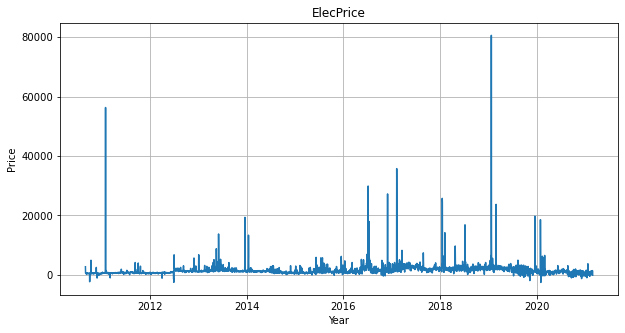

In [15]:
#Plot of ElecPrice over time 
plt.figure(figsize=(10,5))
plt.plot(daily_resampled_dataset['ElecPrice'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('ElecPrice')
plt.grid()
plt.show()

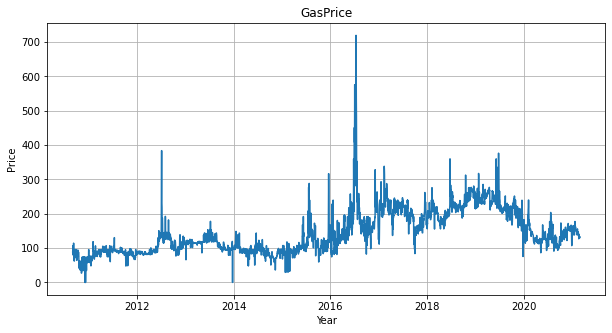

In [16]:
#Plot of ElecPrice over time 
plt.figure(figsize=(10,5))
plt.plot(daily_resampled_dataset['GasPrice'])
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('GasPrice')
plt.grid()
plt.show()

# Time Series Specific Exploratory Methods

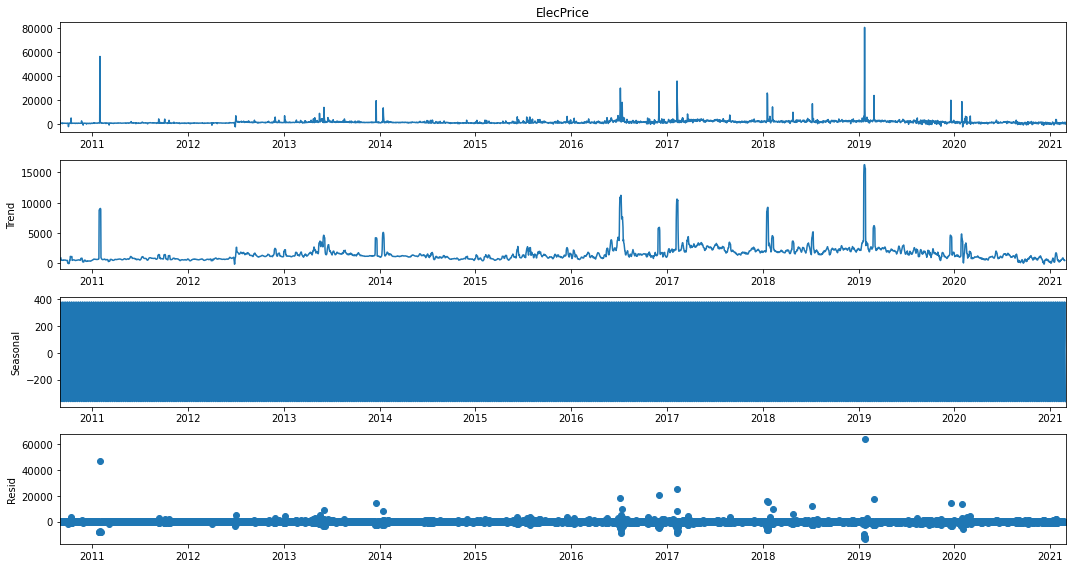

In [17]:
import statsmodels.api as sm
from pylab import rcParams
rcParams[ 'figure.figsize' ] = 15 , 8
decompose_series = sm.tsa.seasonal_decompose(daily_resampled_dataset[ 'ElecPrice' ], model= 'additive' )
decompose_series.plot()
plt.show()

# Augmented Dickey-Fuller test (ADF)

In [18]:
from statsmodels.tsa.stattools import adfuller
#ADF Test for ElecPrice
adf_result = adfuller(daily_resampled_dataset[ 'ElecPrice' ])
print( f'ADF Statistic: {adf_result[ 0 ]} ' )
print( f'p-value: {adf_result[ 1 ]} ' )
print( f'No. of lags used: {adf_result[ 2 ]} ' )
print( f'No. of observations used : {adf_result[ 3 ]} ' )
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
    print( f' {k} : {v} ' )

ADF Statistic: -8.269053866873806 
p-value: 4.848817773711545e-13 
No. of lags used: 20 
No. of observations used : 3813 
Critical Values:
 1% : -3.432066157296446 
 5% : -2.8622983040036005 
 10% : -2.5671736550459663 


The ADF statistic is smaller than the 5 % critical values. That tells us that this series is stationary.

In [19]:
#ADF Test for SysLoad
adf_result = adfuller(daily_resampled_dataset[ 'SysLoad' ])
print( f'ADF Statistic: {adf_result[ 0 ]} ' )
print( f'p-value: {adf_result[ 1 ]} ' )
print( f'No. of lags used: {adf_result[ 2 ]} ' )
print( f'No. of observations used : {adf_result[ 3 ]} ' )
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
    print( f' {k} : {v} ' )

ADF Statistic: -3.6901589888366426 
p-value: 0.00425372550457416 
No. of lags used: 30 
No. of observations used : 3803 
Critical Values:
 1% : -3.432070672988693 
 5% : -2.8623002987378547 
 10% : -2.567174716967499 


The ADF statistic is smaller than the 5 % critical values. That tells us that this series is stationary.

In [20]:
#ADF Test for GasPrice
adf_result = adfuller(daily_resampled_dataset[ 'GasPrice' ])
print( f'ADF Statistic: {adf_result[ 0 ]} ' )
print( f'p-value: {adf_result[ 1 ]} ' )
print( f'No. of lags used: {adf_result[ 2 ]} ' )
print( f'No. of observations used : {adf_result[ 3 ]} ' )
print( 'Critical Values:' )
for k, v in adf_result[ 4 ].items():
    print( f' {k} : {v} ' )

ADF Statistic: -2.9027666971651818 
p-value: 0.04502721288462516 
No. of lags used: 27 
No. of observations used : 3806 
Critical Values:
 1% : -3.4320693157877544 
 5% : -2.8622996992165364 
 10% : -2.5671743978048323 


The ADF statistic is smaller than the 5 % critical values. That tells us that this series is stationary.

# Sorting the training and test dataset

In [21]:
daily_resampled_dataset.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [22]:
daily_resampled_dataset.tail()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495
2021-02-27,564.0,4932.88015,130.0800,488.980
2021-02-28,583.2,6675.05485,131.6352,-98.985


In [23]:
#Extract training dataset from resampled data
training_data = daily_resampled_dataset[:2757]

In [24]:
#Check the lenght of the training data 
len(training_data)

2757

In [25]:
#Checked the first few columns of the training data
training_data.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2010-09-01,379.2,41565.380,88.56,2751.700
2010-09-02,369.6,38898.990,88.56,570.810
2010-09-03,439.2,41665.760,106.80,504.975
2010-09-04,328.8,35638.085,81.36,502.275
2010-09-05,357.6,35611.410,106.80,500.555


In [26]:
#Checked the last few columns of the training data
training_data.tail()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2018-03-15,609.6,27139.02585,220.6272,2717.340
2018-03-16,648.0,19710.46400,216.9600,2277.335
2018-03-17,724.8,1079.34705,209.0400,1718.385
2018-03-18,508.8,-4102.43795,203.9880,1088.015
2018-03-19,561.6,8731.39945,199.2720,1998.305


In [27]:
#Extract test dataset from resampled data
test_data = daily_resampled_dataset[2757:]

In [28]:
#Check the lenght of the test data 
len(test_data)

1077

In [29]:
#Checked the first few columns of the test data
test_data.head()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2018-03-20,540.0,7696.91130,201.5880,1833.00
2018-03-21,571.2,4658.05865,203.2560,1730.49
2018-03-22,722.4,19161.78525,203.2560,2260.55
2018-03-23,811.2,18090.43435,198.6456,2138.76
2018-03-24,832.8,3763.53865,180.2160,1721.70


In [30]:
#Checked the last few columns of the test data
test_data.tail()

,Tmax,SysLoad,GasPrice,ElecPrice
FullDate,,,,
2021-02-24,537.6,-1525.49745,134.4000,634.770
2021-02-25,518.4,4539.07855,130.5048,577.515
2021-02-26,547.2,9517.02430,130.1808,1445.495
2021-02-27,564.0,4932.88015,130.0800,488.980
2021-02-28,583.2,6675.05485,131.6352,-98.985


# Extracted Training and Test Data for Model training

In [31]:
#Resetting the index of training data
training_data = training_data.reset_index()

In [32]:
training_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [33]:
#Resetting the index of test data
test_data = test_data.reset_index()

In [34]:
test_data.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2018-03-20,540.0,7696.91130,201.5880,1833.00
1,2018-03-21,571.2,4658.05865,203.2560,1730.49
2,2018-03-22,722.4,19161.78525,203.2560,2260.55
3,2018-03-23,811.2,18090.43435,198.6456,2138.76
4,2018-03-24,832.8,3763.53865,180.2160,1721.70


# Time series with Facebook Prophet

In [36]:
#Import Prophet
from prophet import Prophet

In [37]:
#Getting the final training data for prophet 
prophet_training_dataset = training_data[['FullDate', 'ElecPrice']]
prophet_training_dataset = prophet_training_dataset.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y" })
prophet_training_dataset.head()

,ds,y
0,2010-09-01,2751.700
1,2010-09-02,570.810
2,2010-09-03,504.975
3,2010-09-04,502.275
4,2010-09-05,500.555


In [38]:
#Initializing the prophet model and training
prophet_model = Prophet()
prophet_model.fit(prophet_training_dataset)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [39]:
#predict for the next 1077 days
future = prophet_model.make_future_dataframe(periods= 1077)
forecast = prophet_model.predict(future)
forecast.head()
forecast[[ 'ds' , 'yhat' , 'yhat_lower' , 'yhat_upper' , 'trend' , 'trend_lower' , 'trend_upper' ]]

,ds,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
0,2010-09-01,986.349389,-1391.147673,3448.056363,842.415148,842.415148,842.415148
1,2010-09-02,1066.687768,-1270.092001,3480.538090,842.387193,842.387193,842.387193
2,2010-09-03,841.687070,-1454.133396,3334.175296,842.359238,842.359238,842.359238
3,2010-09-04,501.396433,-1926.422507,2807.595834,842.331284,842.331284,842.331284
4,2010-09-05,411.453162,-1911.125614,2768.720945,842.303329,842.303329,842.303329
...,...,...,...,...,...,...,...
3829,2021-02-24,3427.058195,638.157555,6552.172365,3516.128535,1934.047363,5279.229947
3830,2021-02-25,3493.917673,437.804598,6291.441169,3516.909233,1933.309079,5282.989429
3831,2021-02-26,3260.718624,300.326588,6331.284740,3517.689931,1932.579344,5286.748912
3832,2021-02-27,2917.369446,137.444587,5857.727265,3518.470629,1931.849609,5290.508395


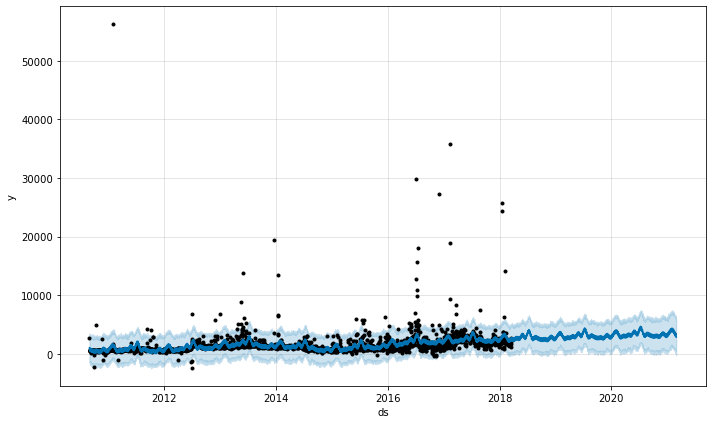

In [40]:
prophet_model.plot(forecast)
plt.show()

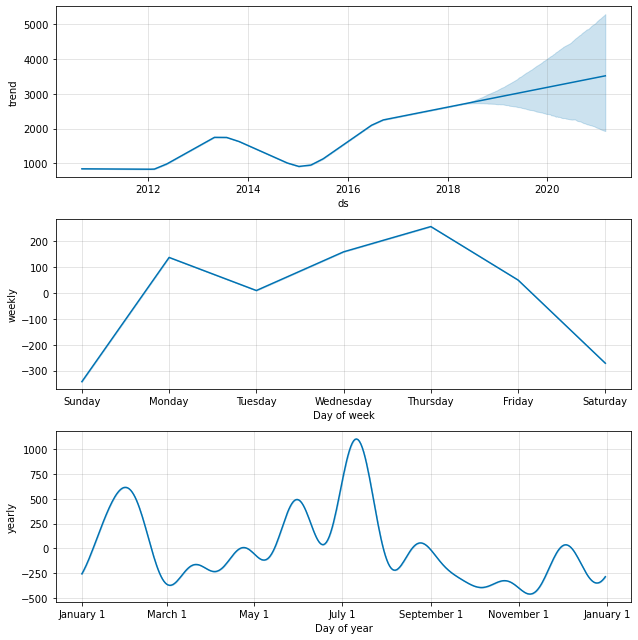

In [43]:
pro_plots= prophet_model.plot_components(forecast)

# Model Evaluation

In [202]:
#Get models predicted values
y_pred = forecast['yhat'][2757:].values

In [203]:
y_pred

array([2524.17405124, 2677.40628297, 2776.31590104, ..., 3260.71862362,
       2917.36944558, 2829.30217314])

In [204]:
len(y_pred)

1077

In [206]:
#Get actual values
y = test_data['ElecPrice'].values

In [207]:
y

array([1833.   , 1730.49 , 2260.55 , ..., 1445.495,  488.98 ,  -98.985])

In [208]:
len(y)

1077

In [209]:
#The Mean Absolute Percentage Error function
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [210]:
print("The MAPE =")
MAPE(y, y_pred)

The MAPE =
{5.41705271101918}


In [192]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y, y_pred)
rmse = math.sqrt(mse)
print("The RMSE = %.2f" %rmse)

The RMSE = 3201.74


# Second Prophet

In [198]:
new_training_ds = training_data

In [199]:
new_training_ds.head()

,FullDate,Tmax,SysLoad,GasPrice,ElecPrice
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [200]:
new_training_ds= new_training_ds.rename(columns={ "FullDate" : "ds" , "ElecPrice" : "y", "SysLoad" : "add1", "Tmax": "add2", "GasPrice":"add3"})

In [201]:
new_training_ds.head()

,ds,add2,add1,add3,y
0,2010-09-01,379.2,41565.380,88.56,2751.700
1,2010-09-02,369.6,38898.990,88.56,570.810
2,2010-09-03,439.2,41665.760,106.80,504.975
3,2010-09-04,328.8,35638.085,81.36,502.275
4,2010-09-05,357.6,35611.410,106.80,500.555


In [223]:
#Initializing the prophet model and training
second_prophet = Prophet()
# second_prophet_training_dataset = second_prophet_training_dataset.add_regressor(second_prophet_training_dataset, 'y')
second_prophet.add_regressor('add1')
second_prophet.add_regressor('add2')
second_prophet.add_regressor('add3')
second_prophet.fit(new_training_ds)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


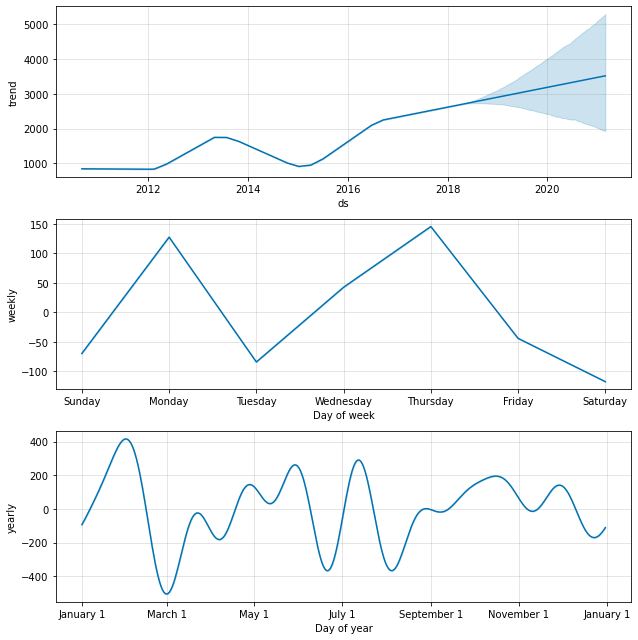

In [217]:
pro_plots= second_prophet.plot_components(forecast)